# Text Mining

997-301-668

In [1]:
import nltk

In [3]:
#nltk.download()

datasets link: https://github.com/skathirmani/datasets

1. Modi Tweets
2. Amazon reviews


Topics
======
1. Regular expressions
2. Web scraping
3. Pandas - yes
4. Scikit learn - yes

In [10]:
import pandas as pd
import numpy as np
modi = pd.read_csv('/datasets/narendramodi_tweets.csv')
modi.shape
modi.head()

,id,retweets_count,favorite_count,created_at,text,lang,retweeted,followers_count,friends_count,hashtags_count,description,location,background_image_url,source
0,8.263846e+17,1406.0,4903.0,2017-01-31 11:00:07,The President's address wonderfully encapsulat...,en,False,26809964.0,1641.0,1.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
1,8.263843e+17,907.0,2877.0,2017-01-31 10:59:12,Rashtrapati Ji's address to both Houses of Par...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
2,8.263827e+17,694.0,0.0,2017-01-31 10:52:33,RT @PMOIndia: Empowering the marginalised. htt...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
3,8.263826e+17,666.0,0.0,2017-01-31 10:52:22,RT @PMOIndia: Commitment to welfare of farmers...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
4,8.263826e+17,716.0,0.0,2017-01-31 10:52:16,RT @PMOIndia: Improving the quality of life fo...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client


In [6]:
# Check the current working directory
import os
os.getcwd()

'/Users/skathirmani/Documents/jupyter-notebooks'

In [8]:
# Get list of png image in the current working directory
import glob
glob.glob('*.png')

['wordcloud.png']

### Bag of word analysis

![wordcloud_modi](wordcloud.png)

### Bag of words in Python
#### Challenges in text data
- Special characters
- Regional language
- Emoticons
- Sarcasm
- Abbreviations, semi sentence,
- 

### Text transformations
- Convert all text to lower case
- Remove common stop words
- Remove special characters
- Apply stemming

In [12]:
doc = modi['text'].str.lower()
doc.head(1)

0    the president's address wonderfully encapsulat...
Name: text, dtype: object

In [23]:
#doc.head(1).str.replace('the', '-')
#doc.head(1).str.replace('a', '-')
#doc.head(1).str.replace('[0-9]', '')
#doc.head(1).str.replace('[a-z]', '')
#doc.head(1).str.replace('[^a-z]', '')
doc_clean = doc.str.replace('[^a-z #@]', '')
doc_clean.head()

0    the presidents address wonderfully encapsulate...
1    rashtrapati jis address to both houses of parl...
2    rt @pmoindia empowering the marginalised https...
3    rt @pmoindia commitment to welfare of farmers ...
4    rt @pmoindia improving the quality of life for...
Name: text, dtype: object

In [37]:
#nltk.downdload('stopwords')
x = ['is', 'this']

y = 'this is not a good product'
z = y.split(' ')

np.setdiff1d(z, x)

['today', 'is', '#is']

In [46]:
['playing', 'played', 'plays']

from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
stemmer.stem('organization')
x = ['a', 'b', 'c']
' '.join(x)

'abc'

In [64]:
from nltk.stem import PorterStemmer
stopwords = nltk.corpus.stopwords.words('english')
custom_stop_words = ['amp', 'rt']
stopwords.extend(custom_stop_words)

def row_clean(v):
    # 1. Remove common stop words
    terms_v = v.split(' ')
    terms_v = [term for term in terms_v if term not in stopwords]
    #terms_v = np.setdiff1d(terms_v, stopwords)
    
    # 2. Identify root of each word
    stemmer = PorterStemmer()
    terms_v = [stemmer.stem(term) for term in terms_v]
    
    return ' '.join(terms_v)
doc_clean = doc_clean.apply(lambda v: row_clean(v))

In [65]:
!pip install wordcloud

spacy 2.0.16 has requirement regex==2018.01.10, but you'll have regex 2018.11.2 which is incompatible.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


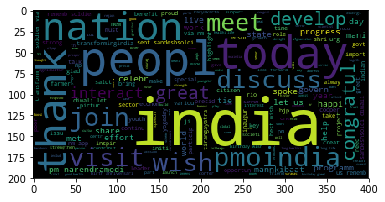

In [71]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#wc = WordCloud().generate('i love india')
wc = WordCloud().generate(' '.join(doc_clean))
plt.imshow(wc)

In [81]:
x = 'india'
x.startswith('#')

False

## Hashtag analysis

#sandeshsoldi            110
#mannkibaat               92
#tirangayatra             84
#yogaday                  53
#transformingindia        52
#idi                      44
#mycleanindia             24
#rio                      19
#                         14
#digidhanmela             11
#happydiwali               9
#iyd                       9
#paralymp                  9
#presidentmukherje         9
#yoga                      9
#swachhbharat              8
#diwali                    8
#internationalyogaday      7
#republicday               5
#digitalpay                5
dtype: int64

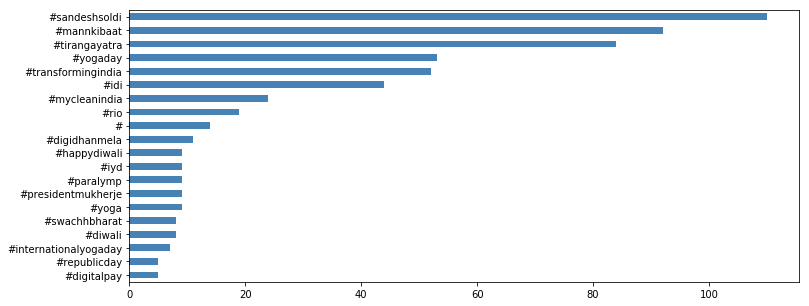

In [118]:
hashtags = []
for row in doc_clean:
    row_tags = [term for term in row.split(' ') 
                if term.startswith('#')]
    #print(row_tags)
    if len(row_tags):
        hashtags.extend(row_tags)

hashtags = pd.Series(hashtags)
hashtags.value_counts().head(20)[::-1].plot.barh(color='steelblue',
                                                figsize=(12,5))
hashtags.value_counts().head(20)

In [102]:
%timeit modi['date'] = pd.to_datetime(modi['created_at'], format='%Y-%m-%d %H:%M:%S')


895 µs ± 12.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [105]:
modi['date'] = pd.to_datetime(modi['created_at'],
                              format='%Y-%m-%d %H:%M:%S')
modi['date'].min(), modi['date'].max()

(Timestamp('2016-03-09 12:22:10'), Timestamp('2017-01-31 11:00:07'))

In [107]:
modi['year_month'] = modi['date'].dt.strftime('%Y_%m')
#modi['year_month'].head()

0    2017_01
1    2017_01
2    2017_01
3    2017_01
4    2017_01
Name: year_month, dtype: object

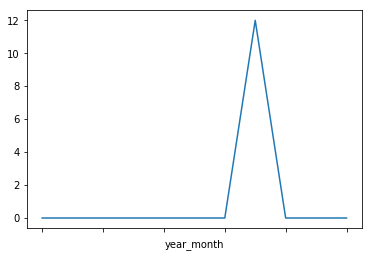

In [123]:
#x = 'this is text mining class'
#pd.Series(x).str.contains('text')
#'text' in x
hashtag = '#mannkibaat' 
modi['is_hashtag'] = doc_clean.str.contains(hashtag)
modi.groupby('year_month')['is_hashtag'].sum().plot.line()

## Document Term Matrix

In [124]:
from sklearn.feature_extraction.text import CountVectorizer

In [129]:
amazon = pd.read_csv('/datasets/amazon_reviews.csv')
amazon.shape
amazon.head(1)

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,0528881469,"[0, 0]",5.0,We got this GPS for my husband who is an (OTR)...,"06 2, 2013",AO94DHGC771SJ,amazdnu,Gotta have GPS!,1.370131e+09


In [135]:
text_col = 'reviewText'
doc = amazon[text_col].fillna('').str.lower()
doc_clean = doc.str.replace('[^a-z #@]', '')
stopwords = nltk.corpus.stopwords.words('english')
custom_stop_words = []
stopwords.extend(custom_stop_words)

def row_clean(v):
    terms_v = v.split(' ')
    terms_v = [term for term in terms_v if term not in stopwords]
    # 2. Identify root of each word
    stemmer = PorterStemmer()
    #terms_v = [stemmer.stem(term) for term in terms_v]
    return ' '.join(terms_v)
doc_clean = doc_clean.apply(lambda v: row_clean(v))
#doc_clean.head()

In [134]:
dtm_func = CountVectorizer()
dtm_func.fit(doc_clean)

dtm_matrix = dtm_func.transform(doc_clean)
dtm_matrix

<999x9444 sparse matrix of type '<class 'numpy.int64'>'
	with 55738 stored elements in Compressed Sparse Row format>

In [141]:
df_dtm = pd.DataFrame(dtm_matrix.toarray(),
                      columns=dtm_func.get_feature_names())
df_dtm.shape

(999, 9444)

### Questions
1. Percentage of zeros in df_dtm 
2. Identify top 25 terms and visualize using a horizontal bar chart
3. Identify biggest review

### 1. Percentage of zeros in df_dtm

In [146]:
(df_dtm == 0).sum().sum() / (df_dtm.shape[0] * df_dtm.shape[1]) * 100

99.40921438168367

### 2. Identify top 25 terms and visualize using a horizontal bar chart

Text(0,0.5,'Terms')

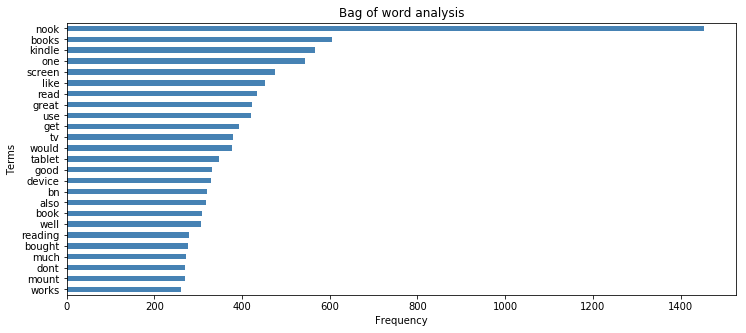

In [166]:
pt = df_dtm.sum().sort_values(ascending=False).head(25)[::-1].plot.barh(
    color='steelblue',
    figsize=(12,5),
    title='Bag of word analysis',
    )
plt.xlabel('Frequency')
plt.ylabel('Terms')

### 3. Identify biggest review

In [168]:
# 274, 387
df_dtm.sum(axis=1).sort_values(ascending=False).head(1)

387    1064
dtype: int64

In [174]:
amazon.loc[387, 'reviewText'][:100]

'EDIT - Update 1.4.1 (12/21/2011): BIG update rolled out on December 14th, with lots of big changes, '

## Word Similarity

In [178]:
x = [1, 2, 3]
y = [1, 2, 3]

from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity([x, y])

array([[1., 1.],
       [1., 1.]])

In [ ]:
cosine_similarity([df_dtm['nook'], df_dtm['tablet']])

terms_similarity = pd.DataFrame(cosine_similarity(df_dtm.T),
                                columns=df_dtm.columns,
                                index=df_dtm.columns)

def get_neighbors(word, terms_similarity):
    
    top5_similar_words = terms_similarity[word].sort_values(
        ascending=False).drop(word).head(5).index
    return top5_similar_words

In [204]:
get_neighbors('screen', terms_similarity)

Index(['like', 'touch', 'reading', 'also', 'much'], dtype='object')

### Bigrams & Trigrams

In [209]:
bigram_dtm_func = CountVectorizer(ngram_range=(2,2))
bigram_dtm_func.fit(doc_clean)

bigram_dtm_matrix = bigram_dtm_func.transform(doc_clean)
bigram_df_dtm = pd.DataFrame(bigram_dtm_matrix.toarray(),
                      columns=bigram_dtm_func.get_feature_names())
bigram_df_dtm.shape

(999, 57447)

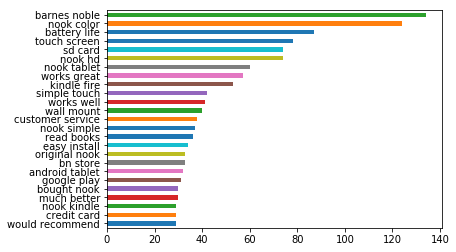

In [210]:
bigram_df_dtm.sum().sort_values(ascending=False).head(25)[::-1].plot.barh()

# Questions
### Kaggle
1. Build decision tree with max_depth=30, random forest & ada boost with 300 estimators
2. Plot roc for all three models in a single graph
3. Compare and see which model is good for your data
4. Predict the test data using the best model
5. Submit and increase your F1 score


### Amazon data
6. Correlated Features
    - Identify top 50 unigrams
    - Extract the relevant columns from DTM
    - Create a correlation matrix. Identify highly correlated features

Description
- Going to use this for my academic purpose
- Will be building social media monitoring dashboard
- Will be performing sentiment analysis, topic modelling etc
- 